# **COVID19 - VAERS EXPLORATORY DATA ANALYSIS**


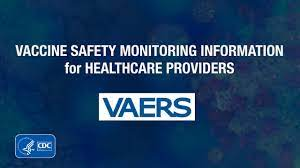

The Vaccine Adverse Event Reporting System (VAERS) was created by the Food and Drug Administration (FDA) and Centers for Disease Control and Prevention (CDC) to receive reports about adverse events that may be associated with vaccinesThe U.S. Department of Health and Human Services (DHHS) established VAERS, which is co-administered by the Food and Drug Administration (FDA) and the Centers for Disease Control (CDC), to accept all reports of suspected adverse events, in all age groups, after the administration of any U.S. licensed vaccine.
All reports are coded and entered to the VAERS database. The adverse events described in each report were coded utilizing the FDA's Coding Symbols called the Medical Dictionary for Regulatory Activities (MedDRA).

We look into and analyse the downloadable VAERS public dataset for a period of 6 months - Jan 2021 to June 2021. 

# LOADING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import textwrap
from textwrap import wrap

from statistics import *

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
Covid19VAERS = pd.read_csv('../input/covid19-vaccine-adverse-reactions-vaers-dataset/Covid1-19_VAERS_Jan_June_2021.csv')

# OVERVIEW OF THE DATA

In [ ]:
############################# Making a copy for safekeep ###############################

covidData = Covid19VAERS.copy()

################################# Information about the data ##############################
print('The file has\n')
print('    Rows       Columns')
print('   {}         {}\n'.format(covidData.shape[0], covidData.shape[1]))

print('This is how the first few samples of data looks like:\n')
print(covidData.head())

So there are 5,45,000+ rows of data and 52 columns. We try to see the nature of columns and see if we need all of them.

In [ ]:
covidDf = covidData.copy()

covidDf.info()

In [ ]:
print('There are {} unique levels in VAX_TYPE and they are {}'.format(covidDf.VAX_TYPE.nunique(), covidDf.VAX_TYPE.unique()))

Hence we can remove the column along with VAERS_ID

In [ ]:
covidDf.drop(['VAERS_ID', 'VAX_TYPE'], axis=1, inplace=True)

In [ ]:
print('The vaccine manufacturers in the data are\n')
print(covidDf.VAX_MANU.value_counts())


# **EXPLORING DATA THROUGH VISUALS AND ANALYZING**

In [ ]:
##################################### % of DATA by VACCINE MANUFACTURER' ###################################################

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,10), dpi=100)

sns.barplot(x=round((covidDf.VAX_MANU.value_counts()/covidDf.shape[0])*100,2), y=covidDf.VAX_MANU.value_counts().index,
           palette='muted', ax=ax[0])
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelbottom=False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xlabel(" ")


for p in ax[0].patches:
    width = p.get_width() 
    annot = width.astype('str')
    ax[0].annotate(annot+'%', xy=(p.get_width(), p.get_y()+p.get_height()/2), fontsize=22,
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

labels = list(covidDf.VAX_MANU.value_counts().index)
ax[1].pie(round((covidDf.VAX_MANU.value_counts()/covidDf.shape[0])*100,2), labels=labels, 
         autopct = '%1.2f%%', textprops={'size': 'xx-large'}, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

plt.suptitle('% of DATA by VACCINE MANUFACTURER', fontsize=26, fontweight='bold')
plt.show()


The dataset contains 45.59% data of Moderna vaccine, 43.43% of Pfizer/BioNTech vaccine and 10.74% of Janssen vaccine of Johnson and Johnson. There are 0.24% of data from unknown manufacturer. Since nothing is known about the manufacturer hence we delete these rows of data.

In [ ]:
manu_index = covidDf[covidDf['VAX_MANU'] == 'UNKNOWN MANUFACTURER'].index
covidDf.drop(manu_index, inplace=True)
print('After dropping the rows with Unknown Vaccine Manufacture, the data now contains\n')
print('{} rows and {} columns'.format(covidDf.shape[0], covidDf.shape[1]))

In [ ]:
################################# Vaccine-manufacture percentage-wise data stands as ##################################

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,10))

sns.barplot(x=round((covidDf.VAX_MANU.value_counts()/covidDf.shape[0])*100,2), y=covidDf.VAX_MANU.value_counts().index,
           palette='muted', edgecolor='darkgray', ax=ax[0])
annot=round((covidDf.VAX_MANU.value_counts()/covidDf.shape[0])*100,2)

for p in ax[0].patches:
    width = p.get_width()
    annot = width.astype('str')
    ax[0].annotate(annot+'%', xy=(p.get_width(), p.get_y()+p.get_height()/2), fontsize=22,
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelbottom=False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xlabel(" ")

labels = list(covidDf.VAX_MANU.value_counts().index)
ax[1].pie(round((covidDf.VAX_MANU.value_counts()/covidDf.shape[0])*100,2), labels=labels, 
         autopct = '%1.2f%%', textprops={'size': 'xx-large'}, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

plt.suptitle('% of DATA by VACCINE MANUFACTURER after DELETING UNKNOWN MANUFACTURER', fontsize=24)
plt.show()

plt.show()

After deleting the Unknown Vaccine Manufacturer, now we have the data comprising 45.7% Moderna, 43.53% Pfizer/BioNTech and 10.77% Janssen.

We start by analyzing the age of the patients.

In [ ]:
print('The null values within age:')
covidDf.AGE_YRS.isna().sum()

AGE_YRS denotes the age of the patient.
The data has 29751 null values. We impute the null values with 0.
Then we form an additional column by grouping the AGE_YRS as follows:  
0 < AGE_YRS < 18 -- 'Child'  
18 <= AGE_YRS < 45 -- 'Young Adult'  
45 <= AGE_YRS < 60 -- 'Senior Adult'  
60 <= AGE_YRS < 80 -- 'Senior Citizen' 
>= 80 -- 'Very Senior Citizen' The data according to age group are as follows: 


In [ ]:
######################### Imputing the null values with 0 and then forming an age group ##########################

covidDf['AGE_YRS'] = covidDf['AGE_YRS'].fillna(0)
covidDf.AGE_YRS.isna().sum()

covidDf.loc[covidDf['AGE_YRS'] == 0, 'AGE'] = 'Unknown'
covidDf.loc[((covidDf['AGE_YRS']>0) & (covidDf['AGE_YRS']<18)), 'AGE'] = 'Child'
covidDf.loc[((covidDf['AGE_YRS']>=18) & (covidDf['AGE_YRS']<45)), 'AGE'] = 'Young Adult'
covidDf.loc[((covidDf['AGE_YRS']>=45) & (covidDf['AGE_YRS']<60)), 'AGE'] = 'Senior Adult'
covidDf.loc[((covidDf['AGE_YRS']>=60) & (covidDf['AGE_YRS']<80)), 'AGE'] = 'Senior Citizen'
covidDf.loc[covidDf['AGE_YRS']>=80, 'AGE'] = 'Very Senior Citizen'

print(covidDf.AGE.value_counts())

We separate out the data of 3 Vaccine Manufacturers and store them in DataFrames:-  
mod - Moderna  
pf - Pfizer/BioNTech  
Jns - Johnson & Johnson

In [ ]:
mod = covidDf[covidDf['VAX_MANU'] =='MODERNA'].copy()
pf =  covidDf[covidDf['VAX_MANU'] =='PFIZER\BIONTECH'].copy()
Jns = covidDf[covidDf['VAX_MANU'] =='JANSSEN'].copy()

In [ ]:
print('mod(Moderna) has {} rows'.format(mod.shape[0]))
print('pf(Pfizer/BioNTech) has {} rows'.format(pf.shape[0]))
print('Jns(Johnson & Johnson has {} rows'.format(Jns.shape[0]))

In [ ]:
############################ TreeMap of Vaccine Adverse Events by AGE ###############################################

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
col = ['lightcoral', 'navajowhite', 'slateblue', 'palegreen', 'orchid']

data = mod.AGE.value_counts().drop('Unknown')
#ax[0].pie(data.values, labels=data.index, autopct = '%d%%', explode =[0.03]*len(data.index),textprops={'fontsize': 20})
labels = [ '\n'.join(wrap(l, 10)) for l in data.index]
squarify.plot(sizes=data.values, label=labels, ax=ax[0], color=col, text_kwargs={'fontsize':14})
ax[0].set_title('MODERNA', fontsize=18)

data = pf.AGE.value_counts().drop('Unknown')
#ax[1].pie(data.values, labels=data.index, autopct = '%d%%', explode =[0.03]*len(data.index),textprops={'size': 'xx-large'})
labels = [ '\n'.join(wrap(l, 10)) for l in data.index]
squarify.plot(sizes=data.values, label=labels, ax=ax[1], color=col, text_kwargs={'fontsize':14})
ax[1].set_title('PFIZER/BIONTECH', fontsize=18)

data = Jns.AGE.value_counts().drop('Unknown')
#ax[2].pie(data.values, labels=data.index, autopct = '%d%%', explode =[0.03]*len(data.index),textprops={'size': 'xx-large'})
labels = [ '\n'.join(wrap(l, 10)) for l in data.index]
squarify.plot(sizes=data.values, label=labels, ax=ax[2], color=col, text_kwargs={'fontsize':14})
ax[2].set_title('JOHNSON & JOHNSON', fontsize=18)

plt.suptitle('Vaccine Adverse Events by AGE', fontsize=24, fontweight='bold')
plt.show()

1. For all 3 vaccines, the most affected age group are'Young Adult' ranging from 18 to 45 years.  
2. Almost 50% affected by Johnson & Johnson vaccine fall in the age group of 18 to 45 years.  
   This is alarming.

The fields described in the tables provide the adverse event coded terms utilizing the MedDRA dictionary. There can be an unlimited amount of coded terms for a given event. Each row in the tables will contain up to 5 MedDRA terms per patient.

In [ ]:
print('The counts of MedDRA of SYMPTOM1 for 3 vaccine manufacturers are:')
print('\nMODERNA: \n', mod.SYMPTOMVERSION1.value_counts())
print('\nPFIZER/BIONTECH: \n', pf.SYMPTOMVERSION1.value_counts())
print('\nJANSSEN: \n', Jns.SYMPTOMVERSION1.value_counts())

There are 2 MedDRA event coded terms of symptoms in 'SYMPTOM1'.  
They are 23.1 and 24.     
The ratio of them for the 3 vaccine manufacturers are as follows   

In [ ]:
############################# Visualize SYMPTOMVERSION1 for Moderna, Pfizer, Janssen ##################################

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,10))

labels = list(mod.SYMPTOMVERSION1.unique())
ax[0].pie(round((mod.SYMPTOMVERSION1.value_counts()/mod.shape[0])*100,2), labels = labels, autopct = '%1.1f%%',
         colors=['crimson', 'greenyellow'], explode =[0.05]*len(labels), textprops={'size': 'xx-large'})
ax[0].set_title('MODERNA', fontsize=24)

labels = list(pf.SYMPTOMVERSION1.unique())
ax[1].pie(round((pf.SYMPTOMVERSION1.value_counts()/pf.shape[0])*100,2), labels=labels, autopct = '%1.1f%%',
         colors=['crimson', 'greenyellow'], textprops={'size': 'xx-large'},explode =[0.03]*len(labels))
ax[1].set_title('PFIZER/BIONTECH', fontsize=24)

labels = list(Jns.SYMPTOMVERSION1.unique())
ax[2].pie(round((pf.SYMPTOMVERSION1.value_counts()/pf.shape[0])*100,2), labels=labels, autopct = '%1.1f%%',
         colors=['crimson', 'greenyellow'], textprops={'size': 'xx-large'},explode =[0.03]*len(labels))
ax[2].set_title('JOHNSON & JOHNSON', fontsize=24)
plt.suptitle('% of MedDRA terms in SYMPTOM1', fontsize=20, fontweight='bold')
plt.show()

The ratio of 23.1 and 24 MedDRA is beyond my scope.    
If anyone finds this useful then one can continue the study from here.   
We look at the top 10 symptoms of SYMPTOM1   

In [ ]:
############### Visualise Top 10 symptoms of SYMPTOM1 for Moderna, Pfizer, Janssen #############

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,10))

modSymp1 = mod.SYMPTOM1.value_counts().sort_values(ascending=False).head(10)
sns.barplot(y=modSymp1.index, x=modSymp1.values, ax=ax[0], palette='bright', edgecolor='darkgray')
ax[0].set_yticklabels([textwrap.fill(e, 10) for e in modSymp1.index])
for p in ax[0].patches:
    width = p.get_width()
    ax[0].annotate(p.get_width(), xy=(p.get_width()-3000, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size=16, weight='bold', color='white')
ax[0].set_title('MODERNA', fontsize=24)

pfSymp1 = pf.SYMPTOM1.value_counts().sort_values(ascending=False).head(10)
sns.barplot(y=pfSymp1.index, x=pfSymp1.values, ax=ax[1], palette='bright', edgecolor='darkgray')
for p in ax[1].patches:
    width = p.get_width()
    ax[1].annotate(p.get_width(), xy=(p.get_width()-2000, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size=16, weight='bold', color='white')
ax[1].set_title('PFIZER/BIONTECH', fontsize=24)

JnsSymp1 = Jns.SYMPTOM1.value_counts().sort_values(ascending=False).head(10)
sns.barplot(y=JnsSymp1.index, x=JnsSymp1.values, ax=ax[2], palette='bright', edgecolor='darkgray')
ax[2].set_yticklabels([textwrap.fill(e, 10) for e in JnsSymp1.index])
for p in ax[2].patches:
    width = p.get_width()
    ax[2].annotate(p.get_width(), xy=(p.get_width()-800, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size=16, weight='bold', color='white')
ax[2].set_title('JOHNSON & JOHNSON', fontsize=24)

for i in range(3):
    ax[i].tick_params(axis='y', labelsize=14)
    ax[i].tick_params(axis='x', bottom=False, labelbottom=False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].set_xlabel(" ")

plt.suptitle('Top 10 SYMPTOMS of Moderna, Pfizer, Johnson & Johnson', fontsize=28, fontweight='bold')
plt.show()


Most of the symtoms are common among the 3 vaccine manufacturers, namely   
Chills, Dizziness, Arthralgia(joint pain), Headache, Pyrexia(fever) etc

Next, we visualise symptoms by Age and Sex.   
Hence we need to ensure not null values in these 2 columns.  

In [ ]:
######################### Vaccine Adverse Events by SEX #############################
################ More Females experienced Vaccine Adverse Events than males ###############

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,10))

data = mod.SEX.value_counts()
ax[0].pie(data.values, labels=data.index, autopct = '%d%%', explode =[0.03]*len(data.index),
          colors=['turquoise', 'greenyellow', 'coral'], textprops={'size': 'xx-large'})
ax[0].set_title('MODERNA', fontsize=24)

data = pf.SEX.value_counts()
ax[1].pie(data.values, labels=data.index, autopct = '%d%%', explode =[0.03]*len(data.index),
          colors=['turquoise', 'greenyellow', 'coral'],textprops={'size': 'xx-large'})
ax[1].set_title('PFIZER/BIONTECH', fontsize=24)

data = Jns.SEX.value_counts()
ax[2].pie(data.values, labels=data.index, autopct = '%d%%', explode =[0.03]*len(data.index),
          colors=['turquoise', 'greenyellow', 'coral'], textprops={'size': 'xx-large'})
ax[2].set_title('JOHNSON & JOHNSON', fontsize=24)

plt.suptitle('Vaccine Adverse Events by SEX\n More Females experienced Vaccine Adverse Events than Males',
             fontsize=24, fontweight='bold')

plt.show()

We notice an important phenomenon -- More females suffered from Vaccine Adverse Events than males.   
This is true for all the 3 vaccines.   
Lets see age-wise distribution of males and females, only, after ignoring the 'Unknown'.

In [ ]:
############## Top 5 SYMPTOM1 by SEX for each of the 3 Vaccine Manufacturers #############

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,10))

##################################### MODERNA #######################################

female = mod[mod['SEX'] == 'F']['SYMPTOM1'].value_counts(ascending=False).head(5).sort_values(ascending=True)
male = mod[mod['SEX'] == 'M']['SYMPTOM1'].value_counts(ascending=False).head(5).sort_values(ascending=True)

ax[0,0].barh(female.index, width=female.values, color='#F13699', edgecolor='dimgray')

for i in range(0,5):
    ax[0,0].annotate(list(female.index)[i], xy=(female.values[i]-1800,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
    annot = round((female.values[i]/mod['SEX'].value_counts()[0])*100, 2)
    annot = annot.astype('str')
    ax[0,0].annotate(annot+'%', xy=(female.values[i]+675,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')

ax[0,0].set_ylabel('MODERNA', fontsize=16)
ax[0,0].set_title('Female', fontsize=16)

ax[0,1].barh(male.index, width=male.values, color='#3FA6DA', edgecolor='dimgray')
for i in range(0,5):
    ax[0,1].annotate(list(male.index)[i], xy=(male.values[i]-450,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
    annot = round((male.values[i]/mod['SEX'].value_counts()[1])*100, 2)
    annot = annot.astype('str')
    ax[0,1].annotate(annot+'%', xy=(male.values[i]+210,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')

ax[0,1].set_ylabel('MODERNA', fontsize=16)
ax[0,1].set_title('Male', fontsize=16)

############################ PFIZER/BIONTECH ################################

female = pf[pf['SEX'] == 'F']['SYMPTOM1'].value_counts(ascending=False).head(5).sort_values(ascending=True)
male = pf[pf['SEX'] == 'M']['SYMPTOM1'].value_counts(ascending=False).head(5).sort_values(ascending=True)

ax[1,0].barh(female.index, width=female.values, color='#F13699', edgecolor='dimgray')

for i in range(0,5):
    ax[1,0].annotate(list(female.index)[i], xy=(female.values[i]-800,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
    annot = round((female.values[i]/mod['SEX'].value_counts()[0])*100, 2)
    annot = annot.astype('str')
    ax[1,0].annotate(annot+'%', xy=(female.values[i]+475,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')

ax[1,0].set_ylabel('PFIZER/BIONTECH', fontsize=16)
ax[1,0].set_title('Female', fontsize=16)

ax[1,1].barh(male.index, width=male.values, color='#3FA6DA', edgecolor='dimgray')
for i in range(0,5):
    ax[1,1].annotate(list(male.index)[i], xy=(male.values[i]-350,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
    annot = round((male.values[i]/mod['SEX'].value_counts()[1])*100, 2)
    annot = annot.astype('str')
    ax[1,1].annotate(annot+'%', xy=(male.values[i]+160,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')

ax[1,1].set_ylabel('PFIZER/BIONTECH', fontsize=16)
ax[1,1].set_title('Male', fontsize=16)

############################### JOHNSON and JOHNSON ########################################

female = Jns[Jns['SEX'] == 'F']['SYMPTOM1'].value_counts(ascending=False).head(5).sort_values(ascending=True)
male = Jns[Jns['SEX'] == 'M']['SYMPTOM1'].value_counts(ascending=False).head(5).sort_values(ascending=True)

ax[2,0].barh(female.index, width=female.values, color='#F13699', edgecolor='dimgray')

for i in range(0,5):
    ax[2,0].annotate(list(female.index)[i], xy=(female.values[i]-350,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
    annot = round((female.values[i]/mod['SEX'].value_counts()[0])*100, 2)
    annot = annot.astype('str')
    ax[2,0].annotate(annot+'%', xy=(female.values[i]+175,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')

ax[2,0].set_ylabel('JOHNSON & JOHNSON', fontsize=16)
ax[2,0].set_title('Female', fontsize=16)

ax[2,1].barh(male.index, width=male.values, color='#3FA6DA', edgecolor='dimgray')
for i in range(0,5):
    ax[2,1].annotate(list(male.index)[i], xy=(male.values[i]-150,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
    annot = round((male.values[i]/mod['SEX'].value_counts()[1])*100, 2)
    annot = annot.astype('str')
    ax[2,1].annotate(annot+'%', xy=(male.values[i]+80,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')

ax[2,1].set_ylabel('JOHNSON & JOHNSON', fontsize=16)
ax[2,1].set_title('Male', fontsize=16)

for i in range(0,3):
    for j in range(0,2):
        ax[i,j].tick_params(axis='y', labelleft=False)
        ax[i,j].tick_params(axis='x', bottom=False, labelbottom=False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        ax[i,j].set_xlabel(" ")


plt.suptitle('Top 5 SYMPTOMS by SEX of 3 Vaccine Manufacturers', fontsize=18, fontweight='bold')
plt.show()

 1. The symptoms for Females and Males are different for Moderna and Pfizer/BioNTech vaccines, while     they are same, but different in volumes, for Johnson & Johnson Vaccine.  
 2. The top 5 symptoms are same for Females for vaccines of Moderna and Johnson & Johnson - 
    Chills, Dizziness, Arthalgia, Headache, Fatigue.   
 3. There is an interesting symptom for Males who took Pfizer/BioNTech vaccine - 3.13% of the Males       were infected with the virus 'Covid-19' against which they took the vaccine for.   
 4. For both vaccines Moderna and Johnson & Johnson, the no 1 adverse reactions was experiencing        'Chills' by both Males and Females. 

In [ ]:
############################## How many are effected? by Age and Sex ##########################

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(16,22))

col=['sandybrown', 'greenyellow', 'aquamarine', 'indianred', 'lightpink']
######################################## MODERNA ########################################
modDf = mod.groupby(['SEX']).AGE.value_counts().unstack()
modDf = pd.DataFrame(modDf)
modDf.drop('Unknown', axis=1, inplace=True)
modDf.drop('U', axis=0, inplace=True)

lbl=([textwrap.fill(e, 10) for e in modDf.columns])

ax[0,0].pie(list(modDf[modDf.index == 'F'].values[0]), labels=lbl, autopct = '%1.1f%%',
            textprops={'size': 'large'}, colors=col)
           
ax[0,0].set_title('Female', fontsize=16, fontweight='bold')
ax[0,0].set_ylabel('MODERNA', fontsize=16)
ax[0,1].pie(list(modDf[modDf.index == 'M'].values[0]), labels=lbl, autopct = '%1.1f%%',
            textprops={'size': 'large'}, colors=col)
ax[0,1].set_title('Male', fontsize=16, fontweight='bold')
ax[0,1].set_ylabel('MODERNA', fontsize=16)

################################# PFIZER/BIONTECH ##################################

pfDf = pf.groupby(['SEX']).AGE.value_counts().unstack()
pfDf = pd.DataFrame(pfDf)
pfDf.drop('Unknown', axis=1, inplace=True)
pfDf.drop('U', axis=0, inplace=True)

lbl=([textwrap.fill(e, 10) for e in pfDf.columns])

ax[1,0].pie(list(pfDf[pfDf.index == 'F'].values[0]), labels=lbl, autopct = '%1.1f%%',
            textprops={'size': 'large'}, colors=col)
ax[1,0].set_title('Female', fontsize=16, fontweight='bold')
ax[1,0].set_ylabel('PFIZER/BIONTECH', fontsize=16)
ax[1,1].pie(list(pfDf[pfDf.index == 'M'].values[0]), labels=lbl, autopct = '%1.1f%%',
            textprops={'size': 'large'}, colors=col)
ax[1,1].set_title('Male', fontsize=16, fontweight='bold')
ax[1,1].set_ylabel('PFIZER/BIONTECH', fontsize=16)

#################################### JOHNSON & JOHNSON ###################################

JnsDf = Jns.groupby(['SEX']).AGE.value_counts().unstack()
JnsDf = pd.DataFrame(JnsDf)
JnsDf.drop('Unknown', axis=1, inplace=True)
JnsDf.drop('U', axis=0, inplace=True)

lbl=([textwrap.fill(e, 10) for e in JnsDf.columns])

ax[2,0].pie(list(JnsDf[JnsDf.index == 'F'].values[0]), labels=lbl, autopct = '%1.1f%%',
            textprops={'size': 'large'}, colors=col)
ax[2,0].set_title('Female', fontsize=16, fontweight='bold')
ax[2,0].set_ylabel('JOHNSON & JOHNSON', fontsize=16)

ax[2,1].pie(list(JnsDf[JnsDf.index == 'M'].values[0]), labels=lbl, autopct = '%1.1f%%',
            textprops={'size': 'large'}, colors=col)
ax[2,1].set_title('Male', fontsize=16, fontweight='bold')
ax[2,1].set_ylabel('JOHNSON & JOHNSON', fontsize=16)

plt.suptitle('How many are affected by SEX and AGE', fontsize=16, fontweight='bold')
plt.show()


A phenomenon to note:  
The 'Young Adult' of the age group 18-45 years are more likely to suufer an adverse vaccine reaction irrespective of the type of vaccine manufacturer.   
An alarming rate of 51.1% of those affected by Johnson and Johnson vaccine are Young Adults.

In [ ]:
########### What are the worst 5 states affected and the least 5 states affected? ##########

print('There are in total {} states'.format(covidDf['STATE'].nunique()))
print('\nWe shall look into the top 5 worst affected states and 5 least affected states by Vaccine Manufacturer')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

df_bad = mod['STATE'].value_counts(ascending=False).head(5).sort_values(ascending=True)
df_good = mod['STATE'].value_counts(ascending=True).head(5).sort_values(ascending=False)
ax[0,0].barh(df_bad.index, width=df_bad.values, color='#F06A4E', edgecolor='darkgray')

for i in range(0,5):
    ax[0,0].annotate(list(df_bad.index)[i], xy=(df_bad.values[i]-1000,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
ax[0,0].set_ylabel('MODERNA', fontsize=16)
ax[0,0].set_title('Most Affected States', fontsize=14)

ax[0,1].barh(df_good.index, width=df_good.values, color='#51D142', edgecolor='darkgray')
for i in range(0,5):
    ax[0,1].annotate(list(df_good.index)[i], xy=(df_good.values[i]-0.20,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
ax[0,1].set_ylabel('MODERNA', fontsize=16)
ax[0,1].set_title('Least Affected States', fontsize=14)


df_bad = pf['STATE'].value_counts(ascending=False).head(5).sort_values(ascending=True)
df_good = pf['STATE'].value_counts(ascending=True).head(5).sort_values(ascending=False)
ax[1,0].barh(df_bad.index, width=df_bad.values, color='#F06A4E', edgecolor='darkgray')

for i in range(0,5):
    ax[1,0].annotate(list(df_bad.index)[i], xy=(df_bad.values[i]-1000,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
ax[1,0].set_ylabel('PFIZER/BIONTECH', fontsize=16)
ax[1,0].set_title('Most Affected States', fontsize=14)

ax[1,1].barh(df_good.index, width=df_good.values, color='#51D142', edgecolor='darkgray')
for i in range(0,5):
    ax[1,1].annotate(list(df_good.index)[i], xy=(df_good.values[i]-0.75,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
ax[1,1].set_ylabel('PFIZER/BIONTECH', fontsize=16)
ax[1,1].set_title('Least Affected States', fontsize=14)


df_bad = Jns['STATE'].value_counts(ascending=False).head(5).sort_values(ascending=True)
df_good = Jns['STATE'].value_counts(ascending=True).head(5).sort_values(ascending=False)
ax[2,0].barh(df_bad.index, width=df_bad.values, color='#F06A4E', edgecolor='darkgray')

for i in range(0,5):
    ax[2,0].annotate(list(df_bad.index)[i], xy=(df_bad.values[i]-250,i), 
             fontsize=14, ha='center', va='center', color='white', fontweight='bold')
ax[2,0].set_ylabel('JOHNSON AND JOHNSON', fontsize=14)
ax[2,0].set_title('Most Affected States', fontsize=14)

ax[2,1].barh(df_good.index, width=df_good.values, color='#51D142', edgecolor='darkgray')
for i in range(0,5):
    ax[2,1].annotate(list(df_good.index)[i], xy=(df_good.values[i]+2,i), 
             fontsize=14, ha='center', va='center', color='black', fontweight='light')
ax[2,1].set_ylabel('JOHNSON AND JOHNSON', fontsize=14)
ax[2,1].set_title('Least Affected States', fontsize=14)


for i in range(0,3):
    for j in range(0,2):
        ax[i,j].tick_params(axis='y', labelleft=False)
        ax[i,j].tick_params(axis='x', bottom=False, labelbottom=False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        ax[i,j].set_xlabel(" ")

plt.suptitle('Top 5 Worst Affected and Least Affected States', fontsize=20, fontweight='bold')
plt.show()


CA, NY, TX, IN and FL are worst 5 states affected by all the 3 vaccines. One reason might be that all the 5 states are heavily populated and hence the absolute number of vaccinations and the adverse affects(if any) are higher than rest of the States.
This is an interesting phenomenon and needs further study on the ratio of affected with respect to the population of the states.

Now let's look at the data that required hospitalisation

In [ ]:
################################################## Ratio of Hospitalization ############################################

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,10))
labels='Hospitalized', 'Not Hospitalized'
lbl=([textwrap.fill(e, 10) for e in labels])
col=['coral', 'darkturquoise']

modHosp = round(list((mod.HOSPITAL.value_counts().values/mod.shape[0])*100)[0], 2)
modNoHosp = 100 - modHosp
values=[modHosp, modNoHosp]
ax[0].pie(values, labels=labels, autopct = '%1.1f%%', textprops={'size': 'xx-large'}, colors=col,
         wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labeldistance=1)
ax[0].set_title('MODERNA', fontsize=22, fontweight='bold')

pfHosp = round(list((pf.HOSPITAL.value_counts().values/pf.shape[0])*100)[0], 2)
pfNoHosp = 100 - pfHosp
values=[pfHosp, pfNoHosp]
ax[1].pie(values, labels=labels, autopct = '%1.1f%%', textprops={'size': 'xx-large'}, colors=col,
         wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labeldistance=1)
ax[1].set_title('PFIZER/BIONTECH', fontsize=22, fontweight='bold')

JnsHosp = round(list((Jns.HOSPITAL.value_counts().values/Jns.shape[0])*100)[0], 2)
JnsNoHosp = 100 - JnsHosp
values=[JnsHosp, JnsNoHosp]
ax[2].pie(values, labels=labels, autopct = '%1.1f%%', textprops={'size': 'xx-large'}, colors=col,
         wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labeldistance=1)
ax[2].set_title('JOHNSON & JOHNSON', fontsize=22, fontweight='bold')

plt.suptitle('% of Hospitalization among 3 Vaccine Manufacturers', fontsize=24, fontweight='bold')
plt.show()

The % of hospitalization are less than 10% for each of the 3 Vaccine Manufacturers.  
maximum hospitalization happened with people who took Pfizer/BioNTech vaccine, which is 9.7%.

Now, we look at the days of stay at the hospital in case of adverse reactions by vaccines.  
Since, not all hospitalization required a stay in the hospital hence we consider only those data that 
has not null values in HOSPDAYS. 

In [ ]:
modHosp = mod[~mod.HOSPDAYS.isna()]
pfHosp = pf[~pf.HOSPDAYS.isna()]
JnsHosp = Jns[~Jns.HOSPDAYS.isna()]

In [ ]:
print('The statistics of Hospital Days are as follows:\n')
print('For MODERNA')
print(modHosp.HOSPDAYS.describe())
print('For PFIZER/BIONTECH')
print(pfHosp.HOSPDAYS.describe())
print('For JOHNSON & JOHNSON')
print(JnsHosp.HOSPDAYS.describe())

Delete rows of data with more than 30 days of hospitalization and AGE = 'Unknown'. 
Also drop the rows with 'Unknown' SEX.

In [ ]:
hosp_idx = modHosp[modHosp.HOSPDAYS >= 30].index
modHosp.drop(hosp_idx, inplace=True)
age_idx = modHosp[modHosp.AGE == 'Unknown'].index
modHosp.drop(age_idx, inplace=True)
sex_idx = modHosp[modHosp['SEX'] == 'U'].index
modHosp.drop(sex_idx, inplace=True)

hosp_idx = pfHosp[pfHosp.HOSPDAYS >= 30].index
pfHosp.drop(hosp_idx, inplace=True)
age_idx = pfHosp[pfHosp.AGE == 'Unknown'].index
pfHosp.drop(age_idx, inplace=True)
sex_idx = pfHosp[pfHosp['SEX'] == 'U'].index
pfHosp.drop(sex_idx, inplace=True)

hosp_idx = JnsHosp[JnsHosp.HOSPDAYS >= 30].index
JnsHosp.drop(hosp_idx, inplace=True)
age_idx = JnsHosp[JnsHosp.AGE == 'Unknown'].index
JnsHosp.drop(age_idx, inplace=True)
sex_idx = JnsHosp[JnsHosp['SEX'] == 'U'].index
JnsHosp.drop(sex_idx, inplace=True)


In [ ]:
fig, ax =plt.subplots(ncols=2, nrows=3, figsize=(16,12))

sns.kdeplot(modHosp.HOSPDAYS, fill=True, alpha=0.6, hue = modHosp.SEX, 
                palette=('indianred', 'steelblue'), multiple='stack', ax=ax[0,0])
sns.kdeplot(modHosp.HOSPDAYS, fill=True, alpha=0.8, hue = modHosp.AGE, 
                palette=('indianred', 'steelblue', 'greenyellow', 'pink', 'lightseagreen'), multiple='stack', ax=ax[0,1])


sns.kdeplot(pfHosp.HOSPDAYS, fill=True, alpha=0.6, hue = pfHosp.SEX, 
                palette=('indianred', 'steelblue'), multiple='stack', ax=ax[1,0])
sns.kdeplot(pfHosp.HOSPDAYS, fill=True, alpha=0.8, hue = pfHosp.AGE, 
                palette=('indianred', 'steelblue', 'greenyellow', 'pink', 'lightseagreen'), multiple='stack', ax=ax[1,1])

sns.kdeplot(JnsHosp.HOSPDAYS, fill=True, alpha=0.6, hue = JnsHosp.SEX, 
                palette=('indianred', 'steelblue'), multiple='stack', ax=ax[2,0])
sns.kdeplot(JnsHosp.HOSPDAYS, fill=True, alpha=0.8, hue = JnsHosp.AGE, 
                palette=('indianred', 'steelblue', 'greenyellow', 'pink', 'lightseagreen'), multiple='stack', ax=ax[2,1])


for i in range(0,3):
    for j in range(0,2):
        ax[i,j].tick_params(left=False, labelleft=False)
        ax[i,j].set_xlabel('Days', fontsize=14)
        ax[i,j].set_ylabel(' ')
        #ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        
ax[0,0].set_ylabel('MODERNA', fontsize=16, fontweight='bold')
ax[0,1].set_ylabel('MODERNA', fontsize=16, fontweight='bold')
ax[1,0].set_ylabel('PFIZER/BIONTECH', fontsize=16, fontweight='bold')
ax[1,1].set_ylabel('PFIZER/BIONTECH', fontsize=16, fontweight='bold')
ax[2,0].set_ylabel('JOHNSON & JOHNSON', fontsize=16, fontweight='bold')
ax[2,1].set_ylabel('JOHNSON & JOHNSON', fontsize=16, fontweight='bold')
   
plt.suptitle('Density distribution of Hospital days by SEX and AGE', fontsize=24, fontweight='bold')
plt.show()

1.  We had observed earlier that more females suffered from Vaccine Adverse Events than males.  
    Here, from the hospital stay density distribution, we see that more males required more
    days in the hospital than females who took Moderna or Johnson & Johnson vaccines.
2.  The 'Young Adults' in the age group of 18-45 yrs were hospitalized for most days who took 
    Pfizer/BioNTech or Johnson & Johnson vaccines. Among people who took Moderna, the 'Senior Adult', 
    belonging to 45-60 years needed the most days in the hospital. 

# **CONCLUSION** 

1.  'Young Adults' belonging to the age group of 18-45 years are most likely to experience
    Vaccine Adverse Reactions.  
2.  Most of the symtoms are common among the 3 vaccine manufacturers, namely  
    Chills, Dizziness, Arthralgia(joint pain), Headache, Pyrexia(fever) etc  
3.  More Females experienced Vaccine Adverse Events than Males  
4.  CA, NY, TX, IN and FL are worst 5 states affected by all the 3 vaccines  
5.  The 'Young Adults' in the age group of 18-45 yrs were hospitalized for most days who took
    Pfizer/BioNTech or Johnson & Johnson vaccines. Among people who took Moderna, the 'Senior Adult', 
    belonging to 45-60 years needed the most days in the hospital.